<a href="https://colab.research.google.com/github/HYChangTAMU/Financial-Data-Analysis/blob/main/Assignment1/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1

Let's picked the following five tech companies.

1. AAPL (market cap ~ \$3 Trillion)
2. TXN (market cap ~ \$160 Billion)
3. GRMN (market cap ~ \$20 Billion)
4. HLIT (market cap ~ \$1.8 Billion)
5. QMCO (market cap ~ \$100 Million)

The historical data came from Yahoo Finance.\
I downloaded the data and put them in my github along with this project.\
I will use pandas package in Python to process the data.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# !rm -r Financial-Data-Analysis
!git clone https://github.com/HYChangTAMU/Financial-Data-Analysis.git
%cd Financial-Data-Analysis
!pwd

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 22)

Cloning into 'Financial-Data-Analysis'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 96 (delta 38), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (96/96), 562.84 KiB | 5.41 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/Financial-Data-Analysis
/content/Financial-Data-Analysis


## Problem 1

For each company, the historical data goes from '2003-07-01' to '2023-06-30'.\
AAPL, TXN, and GRMN have paid dividends, so their historical dividends data are merged with the price data on the dates.\
HLIT and QMCO did not pay dividends, so dividends column with empty values are created for them.


In [2]:
# setup the raw dataframes
# AAPL, TXN, and GRMN have historical dividends
# HLIT and QMCO did not pay dividend, so their dividends column are all NaN
aapl = pd.merge(pd.read_csv("./Assignment1/Data/1AAPL.csv"), pd.read_csv("./Assignment1/Data/1AAPL_div.csv"), on = "Date", how = "outer")
txn = pd.merge(pd.read_csv("./Assignment1/Data/2TXN.csv"), pd.read_csv("./Assignment1/Data/2TXN_div.csv"), on = "Date", how = "outer")
grmn = pd.merge(pd.read_csv("./Assignment1/Data/3GRMN.csv"), pd.read_csv("./Assignment1/Data/3GRMN_div.csv"), on = "Date", how = "outer")
hlit = pd.read_csv("./Assignment1/Data/4HLIT.csv")
hlit["Dividends"] = np.nan
qmco = pd.read_csv("./Assignment1/Data/5QMCO.csv")
qmco["Dividends"] = np.nan

## Problem 2

To compute the **realized average annual returns** and **annual standard deviation**, we should carefully define the trading years first.\
For each year, let's assume that we always trade on July 01 right before closing.\
If July 01 was on a weekend, we use the price on the previous Friday.

In [3]:
# defining years
# assuming that we always trade on July 01 before closing
# If July 01 was on weekend, we use the price on the previous Friday.
y03 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2003-07-01', end = '2004-07-01')]
y04 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2004-07-01', end = '2005-07-01')]
y05 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2005-07-01', end = '2006-06-30')]
y06 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2006-06-30', end = '2007-06-29')]
y07 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2007-06-29', end = '2008-07-01')]
y08 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2008-07-01', end = '2009-07-01')]
y09 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2009-07-01', end = '2010-07-01')]
y10 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2010-07-01', end = '2011-07-01')]
y11 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2011-07-01', end = '2012-06-29')]
y12 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2012-06-29', end = '2013-07-01')]
y13 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2013-07-01', end = '2014-07-01')]
y14 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2014-07-01', end = '2015-07-01')]
y15 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2015-07-01', end = '2016-07-01')]
y16 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2016-07-01', end = '2017-06-30')]
y17 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2017-06-30', end = '2018-06-29')]
y18 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2018-06-29', end = '2019-07-01')]
y19 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2019-07-01', end = '2020-07-01')]
y20 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2020-07-01', end = '2021-07-01')]
y21 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2021-07-01', end = '2022-07-01')]
y22 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2022-07-01', end = '2023-06-30')]

yrs_array = [y03, y04, y05, y06, y07, y08, y09, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22]
yrs_date = [i[0] for i in yrs_array] + [y22[-1]]
# yrs_date = [y03[0], y04[0], y05[0], y06[0], y07[0], y08[0], y09[0], y10[0], y11[0], y12[0], y13[0], y14[0], y15[0], y16[0], y17[0], y18[0], y19[0], y20[0], y21[0], y22[0], y22[-1]]
yrs_list = [2003 + i for i in range(21)]
yrs_series = pd.Series(yrs_list)

### (a)
Using the closing prices at the beginning and end of each year, we find the **annual returns** (including dividends).\
The yearly dividends are simple sums of all dividends paid that year.\
Let's show the relevant data for each company first.

In [4]:
# calculate yearly dividends
def yearly_dividends(x):
  div = [0.0] + [x.loc[x["Date"].isin(i)]["Dividends"].sum() for i in yrs_array]
  return div

# calculate yearly return
def yearly_rtn(x):
  rtn = [None] + [(x["Dividends"][i+1] + x["Close"][i+1] - x["Close"][i])/x["Close"][i] for i in yrs_list[:-1:]]
  return rtn

# extract relevant data for yearly return
def year_data(x):
  y = x.loc[x["Date"].isin(yrs_date)][["Date", "Close"]]
  y["Dividends"] = yearly_dividends(x)
  y = y.set_index([yrs_series])
  y["Yearly Rtn"] = yearly_rtn(y)
  return y


# relevant data for each company
aapl_yr = year_data(aapl)
txn_yr = year_data(txn)
grmn_yr = year_data(grmn)
hlit_yr = year_data(hlit)
qmco_yr = year_data(qmco)

In [5]:
aapl_yr.style.set_caption("AAPL")

,Date,Close,Dividends,Yearly Rtn
2003,2003-07-01,0.340893,0.000000,nan
2004,2004-07-01,0.576786,0.000000,0.691985
2005,2005-07-01,1.303571,0.000000,1.260060
2006,2006-06-30,2.045357,0.000000,0.569042
2007,2007-06-29,4.358571,0.000000,1.130959
2008,2008-07-01,6.238571,0.000000,0.431334
2009,2009-07-01,5.101071,0.000000,-0.182333
2010,2010-07-01,8.874286,0.000000,0.739691
2011,2011-07-01,12.259286,0.000000,0.381439
2012,2012-06-29,20.857143,0.000000,0.701334


In [6]:
txn_yr.style.set_caption("TXN")

,Date,Close,Dividends,Yearly Rtn
2003,2003-07-01,17.620001,0.000000,nan
2004,2004-07-01,23.540001,0.084000,0.340749
2005,2005-07-01,28.030001,0.098000,0.194902
2006,2006-06-30,30.290001,0.115000,0.084731
2007,2007-06-29,37.630001,0.190000,0.248597
2008,2008-07-01,27.639999,0.380000,-0.255381
2009,2009-07-01,21.600000,0.430000,-0.202967
2010,2010-07-01,23.170000,0.470000,0.094444
2011,2011-07-01,33.520000,0.510000,0.468710
2012,2012-06-29,28.690001,0.640000,-0.125000


In [7]:
grmn_yr.style.set_caption("GRMN")

,Date,Close,Dividends,Yearly Rtn
2003,2003-07-01,19.434999,0.000000,nan
2004,2004-07-01,17.330000,0.250000,-0.095446
2005,2005-07-01,21.834999,0.250000,0.274380
2006,2006-06-30,52.720001,0.250000,1.425922
2007,2007-06-29,73.970001,0.500000,0.412557
2008,2008-07-01,42.939999,0.750000,-0.409355
2009,2009-07-01,24.049999,0.750000,-0.422450
2010,2010-07-01,29.799999,2.251000,0.332682
2011,2011-07-01,33.580002,0.800000,0.153691
2012,2012-06-29,38.290001,1.650000,0.189398


In [8]:
hlit_yr.style.set_caption("HLIT")

,Date,Close,Dividends,Yearly Rtn
2003,2003-07-01,4.100000,0.000000,nan
2004,2004-07-01,7.420000,0.000000,0.809756
2005,2005-07-01,4.920000,0.000000,-0.336927
2006,2006-06-30,4.480000,0.000000,-0.089431
2007,2007-06-29,8.870000,0.000000,0.979911
2008,2008-07-01,9.610000,0.000000,0.083427
2009,2009-07-01,5.960000,0.000000,-0.379813
2010,2010-07-01,5.570000,0.000000,-0.065436
2011,2011-07-01,7.460000,0.000000,0.339318
2012,2012-06-29,4.260000,0.000000,-0.428954


In [9]:
qmco_yr.style.set_caption("QMCO")

,Date,Close,Dividends,Yearly Rtn
2003,2003-07-01,32.400002,0.000000,nan
2004,2004-07-01,24.000000,0.000000,-0.259259
2005,2005-07-01,23.600000,0.000000,-0.016667
2006,2006-06-30,20.959999,0.000000,-0.111864
2007,2007-06-29,25.360001,0.000000,0.209924
2008,2008-07-01,10.800000,0.000000,-0.574133
2009,2009-07-01,7.840000,0.000000,-0.274074
2010,2010-07-01,14.880000,0.000000,0.897959
2011,2011-07-01,26.959999,0.000000,0.811828
2012,2012-06-29,16.240000,0.000000,-0.397626


The **realized average annual returns** are:
1. AAPL: 0.38382
2. TXN: 0.14466
3. GRMN: 0.12001
4. HLIT: 0.07102
5. QMCO: -0.15639

In [39]:
# getting the realized average annual returns
def realized_avg_annual_rtn(x):
  cpd = 1
  for i in x["Yearly Rtn"]:
    cpd = cpd * (1 + i) if not pd.isna(i) else cpd
  return cpd ** 0.05 - 1

In [34]:
realized_avg_annual_rtn(aapl_yr)

0.38381501628362447

In [35]:
realized_avg_annual_rtn(txn_yr)

0.1446555273828931

In [36]:
realized_avg_annual_rtn(grmn_yr)

0.12001129892982365

In [37]:
realized_avg_annual_rtn(hlit_yr)

0.07101686145156605

In [38]:
realized_avg_annual_rtn(qmco_yr)

-0.15638569393443724

The **standard deviation** of the annual returns are:
1. AAPL: 0.41361
2. TXN: 0.23211
3. GRMN: 0.42188
4. HLIT: 0.47563
5. QMCO: 0.60263

Note that these numbers are sample standard deviations.

In [10]:
aapl_yr["Yearly Rtn"].std()

0.4136092789815918

In [23]:
txn_yr["Yearly Rtn"].std()

0.23210663866832482

In [24]:
grmn_yr["Yearly Rtn"].std()

0.4218781480244717

In [25]:
hlit_yr["Yearly Rtn"].std()

0.47562889522827106

In [26]:
qmco_yr["Yearly Rtn"].std()

0.6026339997152567

### (b)
Using the daily closing prices, we find the **daily returns** (including dividends).\
Whenever dividends are paid, the daily return includes the dividend yield.\
Let's show the relevant data for each company first.

In [11]:
# calculate daily return including dividends
def daily_rtn(x):
  rtn = [None] + [(x["Dividends"][i+1] + x["Close"][i+1] - x["Close"][i])/x["Close"][i] if not pd.isna(x["Dividends"][i+1]) else (x["Close"][i+1] - x["Close"][i])/x["Close"][i] for i in range(len(x["Close"]) - 1)]
  return rtn

# relevant data for daily return
def daily_data(x):
  x["Daily Rtn"] = daily_rtn(x)
  return x[["Date", "Close", "Dividends", "Daily Rtn"]]


# relevant daily dataframes
aapl_day = daily_data(aapl)
txn_day = daily_data(txn)
grmn_day = daily_data(grmn)
hlit_day = daily_data(hlit)
qmco_day = daily_data(qmco)

In [50]:
aapl_day

,Date,Close,Dividends,Daily Rtn
0,2003-07-01,0.340893,NaN,NaN
1,2003-07-02,0.344107,NaN,0.009428
2,2003-07-03,0.341607,NaN,-0.007265
3,2003-07-07,0.354821,NaN,0.038682
4,2003-07-08,0.364286,NaN,0.026675
...,...,...,...,...
5030,2023-06-26,185.270004,NaN,-0.007553
5031,2023-06-27,188.059998,NaN,0.015059
5032,2023-06-28,189.250000,NaN,0.006328
5033,2023-06-29,189.589996,NaN,0.001797


In [13]:
txn_day

,Date,Close,Dividends,Daily Rtn
0,2003-07-01,17.620001,NaN,NaN
1,2003-07-02,18.219999,NaN,0.034052
2,2003-07-03,17.750000,NaN,-0.025796
3,2003-07-07,18.889999,NaN,0.064225
4,2003-07-08,19.070000,NaN,0.009529
...,...,...,...,...
5030,2023-06-26,168.750000,NaN,0.006381
5031,2023-06-27,176.309998,NaN,0.044800
5032,2023-06-28,174.960007,NaN,-0.007657
5033,2023-06-29,176.789993,NaN,0.010459


In [14]:
grmn_day

,Date,Close,Dividends,Daily Rtn
0,2003-07-01,19.434999,NaN,NaN
1,2003-07-02,20.535000,NaN,0.056599
2,2003-07-03,20.330000,NaN,-0.009983
3,2003-07-07,20.325001,NaN,-0.000246
4,2003-07-08,21.235001,NaN,0.044772
...,...,...,...,...
5030,2023-06-26,102.480003,NaN,0.009059
5031,2023-06-27,103.500000,NaN,0.009953
5032,2023-06-28,102.379997,NaN,-0.010821
5033,2023-06-29,103.599998,NaN,0.011916


In [15]:
hlit_day

,Date,Close,Dividends,Daily Rtn
0,2003-07-01,4.100000,NaN,NaN
1,2003-07-02,4.490000,NaN,0.095122
2,2003-07-03,4.410000,NaN,-0.017817
3,2003-07-07,4.650000,NaN,0.054422
4,2003-07-08,4.600000,NaN,-0.010753
...,...,...,...,...
5030,2023-06-26,16.379999,NaN,-0.016216
5031,2023-06-27,16.030001,NaN,-0.021367
5032,2023-06-28,16.030001,NaN,0.000000
5033,2023-06-29,16.190001,NaN,0.009981


In [16]:
qmco_day

,Date,Close,Dividends,Daily Rtn
0,2003-07-01,32.400002,NaN,NaN
1,2003-07-02,34.560001,NaN,0.066667
2,2003-07-03,32.560001,NaN,-0.057870
3,2003-07-07,38.880001,NaN,0.194103
4,2003-07-08,38.160000,NaN,-0.018519
...,...,...,...,...
5030,2023-06-26,1.030000,NaN,-0.046296
5031,2023-06-27,1.040000,NaN,0.009709
5032,2023-06-28,1.110000,NaN,0.067308
5033,2023-06-29,1.120000,NaN,0.009009


With the daily return, we can compute the **realized annual return** by compounding.\
Let's compare **Yearly Rtn** and **Realized Annual Return** for each company.

Notice that the two values are very close but sometimes differ by a small amount.\
These differences are caused by the dividends.\
In **Yearly Rtn**, the dividends were simply summed.\
In **Realized Annual Return**, the dividends were part of daily returns and participated in compounding.

In [17]:
# converting daily return to realized annual return by compounding
def realized_annual_rtn(x):
  rtn_list = [None]
  for k in yrs_array:
    rtn = 1
    for i in x.loc[x["Date"].isin(k[1:])]["Daily Rtn"]:
      rtn = rtn * (1 + i) if not pd.isna(i) else rtn
    rtn_list.append(rtn - 1)
  return pd.DataFrame({"Realized Annual Return" : rtn_list}, index = yrs_list)

In [18]:
pd.merge(aapl_yr["Yearly Rtn"], realized_annual_rtn(aapl), left_index = True, right_index = True).style.set_caption("AAPL")

,Yearly Rtn,Realized Annual Return
2003,nan,nan
2004,0.691985,0.691985
2005,1.260060,1.260060
2006,0.569042,0.569042
2007,1.130959,1.130959
2008,0.431334,0.431334
2009,-0.182333,-0.182333
2010,0.739691,0.739691
2011,0.381439,0.381439
2012,0.701334,0.701334


In [19]:
pd.merge(txn_yr["Yearly Rtn"], realized_annual_rtn(txn), left_index = True, right_index = True).style.set_caption("TXN")

,Yearly Rtn,Realized Annual Return
2003,nan,nan
2004,0.340749,0.340411
2005,0.194902,0.195800
2006,0.084731,0.084661
2007,0.248597,0.249699
2008,-0.255381,-0.256565
2009,-0.202967,-0.199820
2010,0.094444,0.093677
2011,0.468710,0.470885
2012,-0.125000,-0.126679


In [20]:
pd.merge(grmn_yr["Yearly Rtn"], realized_annual_rtn(grmn), left_index = True, right_index = True).style.set_caption("GRMN")

,Yearly Rtn,Realized Annual Return
2003,nan,nan
2004,-0.095446,-0.100350
2005,0.274380,0.270784
2006,1.425922,1.436107
2007,0.412557,0.417037
2008,-0.409355,-0.415152
2009,-0.422450,-0.415236
2010,0.332682,0.321399
2011,0.153691,0.154541
2012,0.189398,0.189782


In [21]:
pd.merge(hlit_yr["Yearly Rtn"], realized_annual_rtn(hlit), left_index = True, right_index = True).style.set_caption("HLIT")

,Yearly Rtn,Realized Annual Return
2003,nan,nan
2004,0.809756,0.809756
2005,-0.336927,-0.336927
2006,-0.089431,-0.089431
2007,0.979911,0.979911
2008,0.083427,0.083427
2009,-0.379813,-0.379813
2010,-0.065436,-0.065436
2011,0.339318,0.339318
2012,-0.428954,-0.428954


In [22]:
pd.merge(qmco_yr["Yearly Rtn"], realized_annual_rtn(qmco), left_index = True, right_index = True).style.set_caption("QMCO")

,Yearly Rtn,Realized Annual Return
2003,nan,nan
2004,-0.259259,-0.259259
2005,-0.016667,-0.016667
2006,-0.111864,-0.111864
2007,0.209924,0.209924
2008,-0.574133,-0.574133
2009,-0.274074,-0.274074
2010,0.897959,0.897959
2011,0.811828,0.811828
2012,-0.397626,-0.397626


The **realized average annual returns** obtained by converting daily data are:
1. AAPL: 0.38449
2. TXN: 0.14610
3. GRMN: 0.12078
4. HLIT: 0.07102
5. QMCO: -0.15639

In [42]:
# getting the realized average annual returns
def day_to_year_realized_avg_annual_rtn(x):
  cpd = 1
  for i in x["Realized Annual Return"]:
    cpd = cpd * (1 + i) if not pd.isna(i) else cpd
  return cpd ** 0.05 - 1

In [45]:
day_to_year_realized_avg_annual_rtn(realized_annual_rtn(aapl))

0.3844875582447982

In [46]:
day_to_year_realized_avg_annual_rtn(realized_annual_rtn(txn))

0.14610000887938734

In [47]:
day_to_year_realized_avg_annual_rtn(realized_annual_rtn(grmn))

0.1207799400687748

In [48]:
day_to_year_realized_avg_annual_rtn(realized_annual_rtn(hlit))

0.0710168614515665

In [49]:
day_to_year_realized_avg_annual_rtn(realized_annual_rtn(qmco))

-0.15638569393443702

The **standard deviation** of the annual returns are:
1. AAPL: 0.33396
2. TXN: 0.29777
3. GRMN: 0.36635
4. HLIT: 0.51681
5. QMCO: 0.79876

Note that these numbers are daily standard deviations multiplied by root 252.\
These values are a bit different from the ones calculated by yearly data.\
Because this formula assumed that each return is independent event, it serves only as an estimation.

In [52]:
aapl_day["Daily Rtn"].std() * np.sqrt(252)

0.3339559841032162

In [56]:
txn_day["Daily Rtn"].std() * np.sqrt(252)

0.2977673825920961

In [57]:
grmn_day["Daily Rtn"].std() * np.sqrt(252)

0.36634552028684464

In [59]:
hlit_day["Daily Rtn"].std() * np.sqrt(252)

0.5168110519548279

In [61]:
qmco_day["Daily Rtn"].std() * np.sqrt(252)

0.7987620874710998

### (c)
Let's plot the **distributions** using daily returns.\
We can see that the distributions are similar to bell shapes, but there seem to be some outliers.\
Also, the width gets bigger when the market cap becomes smaller.\
It may be an indication that smaller stocks have higher volatility.

In [81]:
# plot distributions with 200 bins and ranged by min and max of daily return
def plot_distribution(x):
  x.plot.hist(column = ["Daily Rtn"], bins = 200, range = (x["Daily Rtn"].min(), x["Daily Rtn"].max()))

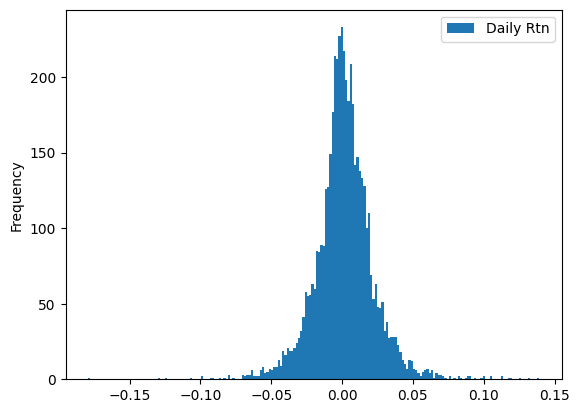

In [82]:
plot_distribution(aapl_day)

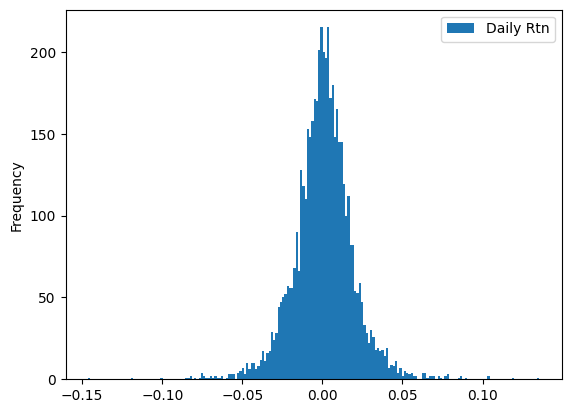

In [84]:
plot_distribution(txn_day)

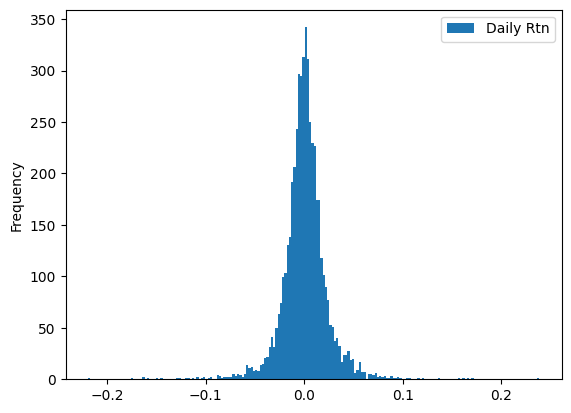

In [85]:
plot_distribution(grmn_day)

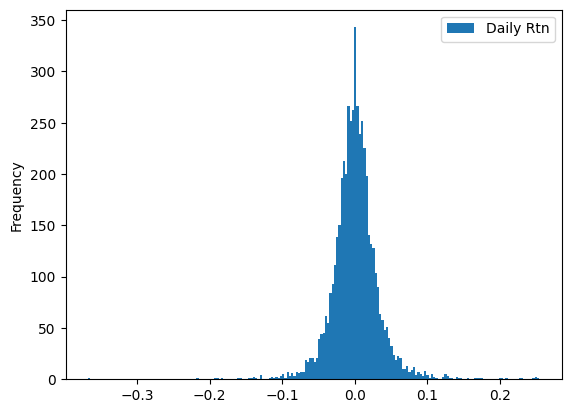

In [86]:
plot_distribution(hlit_day)

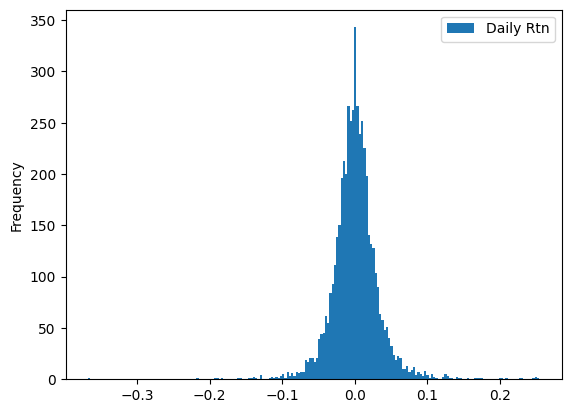

In [87]:
plot_distribution(hlit_day)

### (d)
Finally, let's plot the **cumulative returns**.